#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Data

In [ ]:
#Load Dataset
df = pd.read_csv('/content/insight_test.csv')
df.head()

,store_code,store_location,order_id,user_id,order_time,delivered_time,products_persona_agg,user_location,total_value_order
0,10011,"-6.168783,106.87677",App-7001192545-1-01,1697711.0,1711249956000,1.711262e+12,"fresh,sembako","-6.1522268,106.8387461",100350.0
1,10011,"-6.168783,106.87677",App-7001121785-1-01,1440401.0,1710144925000,NaN,"household,sembako,snack","-6.1303084,106.854557",251420.0
2,10011,"-6.168783,106.87677",App-7001100711-1-01,1090453.0,1709619150000,1.709623e+12,"fresh,sembako,soft drink and dessert","-6.1838679,106.8657444",139825.0
3,10011,"-6.168783,106.87677",App-7001125693-1-01,1440401.0,1710235525000,1.710243e+12,"household,sembako,snack,soft drink and dessert","-6.1303084,106.854557",258709.0
4,10011,"-6.168783,106.87677",App-4000242981-1-01,34683.0,1710214778000,1.710222e+12,"fresh,snack,soft drink and dessert","-6.1634499,106.92140614",149430.0


#Data Profiling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40722 entries, 0 to 40721
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_code            40722 non-null  int64  
 1   store_location        40722 non-null  object 
 2   order_id              40722 non-null  object 
 3   user_id               39877 non-null  float64
 4   order_time            40722 non-null  int64  
 5   delivered_time        27726 non-null  float64
 6   products_persona_agg  40722 non-null  object 
 7   user_location         40722 non-null  object 
 8   total_value_order     40722 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.8+ MB


⚠️ The data has missing values in the user_id and delivered_time column

There is a possibility of missing values in delivered_time because the item has not been sent yet or is pending.

#Data Processing

In [ ]:
# Show sum of missing value in each feature
df.isnull().sum()

,0
store_code,0
store_location,0
order_id,0
user_id,845
order_time,0
delivered_time,12996
products_persona_agg,0
user_location,0
total_value_order,0


In [ ]:
# Handling duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
# Replace null value in the user_id column with 'None' to avoid data misunderstanding
df['user_id'] = df['user_id'].fillna('None')

In [ ]:
# Replace null value in the delivered_time column with 'NaT' to convert to datetime
df['delivered_time'] = df['delivered_time'].fillna(pd.NaT)

In [ ]:
# Change the Date column type to Datetime
df['order_time'] = pd.to_datetime(df['order_time'], unit='ms', errors='coerce')
df['delivered_time'] = pd.to_datetime(df['delivered_time'], unit='ms', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40722 entries, 0 to 40721
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   store_code            40722 non-null  int64         
 1   store_location        40722 non-null  object        
 2   order_id              40722 non-null  object        
 3   user_id               40722 non-null  object        
 4   order_time            40722 non-null  datetime64[ns]
 5   delivered_time        27726 non-null  datetime64[ns]
 6   products_persona_agg  40722 non-null  object        
 7   user_location         40722 non-null  object        
 8   total_value_order     40722 non-null  float64       
 9   product_categories    40722 non-null  object        
 10  delivery_duration     27726 non-null  float64       
 11  delivery_status       40722 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 3.7+ M

In [ ]:
# Data Profiling
def data_profiling(df):
    profile = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.values,
        "Non-Null Count": df.notnull().sum().values,
        "Unique Values": df.nunique().values,
        "Sample Values": [df[col].unique()[:5] for col in df.columns]
    })
    return profile

profile = data_profiling(df)
print(profile)

                 Column       Data Type  Non-Null Count  Unique Values  \
0            store_code           int64           40722             10   
1        store_location          object           40722             10   
2              order_id          object           40722          40722   
3               user_id          object           40722          17671   
4            order_time  datetime64[ns]           40722          39923   
5        delivered_time  datetime64[ns]           27726          27355   
6  products_persona_agg          object           40722             51   
7         user_location          object           40722           6463   
8     total_value_order         float64           40722          12347   

                                       Sample Values  
0                [10011, 10059, 10066, 10072, 10075]  
1  [-6.168783,106.87677, -6.177183,106.79061, -6....  
2  [App-7001192545-1-01, App-7001121785-1-01, App...  
3  [1697711.0, 1440401.0, 1090453.0, 34

In [ ]:
# Pisahkan kolom berdasarkan tipe data
cats = df.select_dtypes(include=['object']).columns.tolist()
nums = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
dates = df.select_dtypes(include=['datetime64']).columns.tolist()

print("Categorical variables:", cats)
print("Numeric variables:", nums)
print("Datetime variables:", dates)

Categorical variables: ['store_location', 'order_id', 'user_id', 'products_persona_agg', 'user_location']
Numeric variables: ['store_code', 'total_value_order']
Datetime variables: ['order_time', 'delivered_time']


In [ ]:
df[cats].describe()

,store_location,order_id,user_id,products_persona_agg,user_location
count,40722,40722,40722,40722,40722
unique,10,40722,17671,51,6463
top,"-6.168783,106.87677",App-7001124275-1-01,None,sembako,"-6.1773686,106.7906723"
freq,5079,1,845,15365,1313


In [ ]:
df[nums].describe()

,store_code,total_value_order
count,40722.000000,4.072200e+04
mean,18876.237709,2.482503e+05
std,13647.783010,3.925902e+06
min,10011.000000,1.690000e+03
25%,10066.000000,1.014000e+05
50%,10075.000000,1.197240e+05
75%,40014.000000,2.614818e+05
max,40017.000000,6.189031e+08


In [ ]:
df[dates].describe()

,order_time,delivered_time
count,40722,27726
mean,2024-03-19 12:38:36.805240576,2024-03-19 20:29:27.435764224
min,2024-02-29 17:01:29,2024-03-01 02:49:21
25%,2024-03-14 03:40:36,2024-03-13 10:54:50.750000128
50%,2024-03-20 00:24:14,2024-03-21 10:38:12
75%,2024-03-26 05:29:37.500000,2024-03-26 13:27:50.500000
max,2024-03-31 16:59:07,2024-04-06 20:50:38


In [ ]:
df.head()

,store_code,store_location,order_id,user_id,order_time,delivered_time,products_persona_agg,user_location,total_value_order
0,10011,"-6.168783,106.87677",App-7001192545-1-01,1697711.0,2024-03-24 03:12:36,2024-03-24 06:27:17,"fresh,sembako","-6.1522268,106.8387461",100350.0
1,10011,"-6.168783,106.87677",App-7001121785-1-01,1440401.0,2024-03-11 08:15:25,NaT,"household,sembako,snack","-6.1303084,106.854557",251420.0
2,10011,"-6.168783,106.87677",App-7001100711-1-01,1090453.0,2024-03-05 06:12:30,2024-03-05 07:14:50,"fresh,sembako,soft drink and dessert","-6.1838679,106.8657444",139825.0
3,10011,"-6.168783,106.87677",App-7001125693-1-01,1440401.0,2024-03-12 09:25:25,2024-03-12 11:31:41,"household,sembako,snack,soft drink and dessert","-6.1303084,106.854557",258709.0
4,10011,"-6.168783,106.87677",App-4000242981-1-01,34683.0,2024-03-12 03:39:38,2024-03-12 05:44:49,"fresh,snack,soft drink and dessert","-6.1634499,106.92140614",149430.0


In [ ]:
df.tail()

,store_code,store_location,order_id,user_id,order_time,delivered_time,products_persona_agg,user_location,total_value_order
40717,40017,"-6.27782,106.71944",App-7001211317-1-01,1706587.0,2024-03-27 01:24:29,2024-03-27 06:22:53,snack,"-6.2584863,106.7359841",96900.0
40718,40017,"-6.27782,106.71944",App-7001213347-1-01,1721857.0,2024-03-27 06:44:21,2024-03-27 07:32:06,snack,"-6.2584863,106.7359841",106900.0
40719,40017,"-6.27782,106.71944",App-7001211429-1-01,1706655.0,2024-03-27 01:43:38,2024-03-27 03:21:20,snack,"-6.2584863,106.7359841",106900.0
40720,40017,"-6.27782,106.71944",App-7001180997-1-01,3391.0,2024-03-22 06:10:56,2024-03-22 08:57:56,household,"-6.2615931,106.6991627",259400.0
40721,40017,"-6.27782,106.71944",App-7001124275-1-01,1530121.0,2024-03-12 04:46:54,2024-03-12 06:17:00,soft drink and dessert,"-6.3089944,106.7378497",149600.0


#Descriptive Statistics

In [ ]:
df.describe()

,store_code,order_time,delivered_time,total_value_order
count,40722.000000,40722,27726,4.072200e+04
mean,18876.237709,2024-03-19 12:38:36.805240576,2024-03-19 20:29:27.435764224,2.482503e+05
min,10011.000000,2024-02-29 17:01:29,2024-03-01 02:49:21,1.690000e+03
25%,10066.000000,2024-03-14 03:40:36,2024-03-13 10:54:50.750000128,1.014000e+05
50%,10075.000000,2024-03-20 00:24:14,2024-03-21 10:38:12,1.197240e+05
75%,40014.000000,2024-03-26 05:29:37.500000,2024-03-26 13:27:50.500000,2.614818e+05
max,40017.000000,2024-03-31 16:59:07,2024-04-06 20:50:38,6.189031e+08
std,13647.783010,NaN,NaN,3.925902e+06


# EDA and Visualization

**1. Distribusi Frekuensi Penjualan Produk per Kategori di Platform Allofresh**

product_categories
sembako                   29643
snack                     10866
soft drink and dessert     9449
household                  9187
fresh                      6810
other                        58
Name: count, dtype: int64


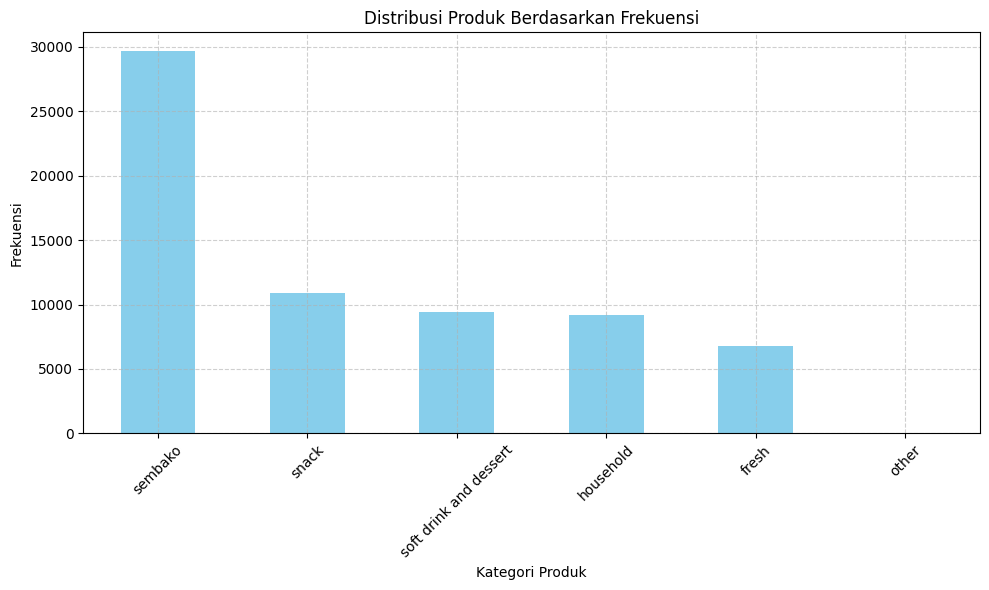

In [ ]:
# Mengambil kategori produk dari kolom 'products_persona_agg'
df['product_categories'] = df['products_persona_agg'].str.split(',')

# Meratakan daftar kategori untuk menghitung frekuensinya
category_list = df['product_categories'].explode()

# Menghitung jumlah kemunculan masing-masing kategori produk
category_counts = category_list.value_counts()
category_counts_sorted = category_counts.sort_values(ascending=False)
print(category_counts_sorted)

# Visualisasi
category_counts_sorted.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribusi Produk Berdasarkan Frekuensi')
plt.xlabel('Kategori Produk')
plt.ylabel('Frekuensi')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kategori sembako menjadi produk paling dominan dalam penjualan e-grocery masyarakat yang menunjukkan tingginya kebutuhan terhadap barang pokok, sementara kategori lain seperti 'other' perlu dievaluasi kembali karena kontribusinya yang sangat rendah.

**2. Rata-Rata Nilai Transaksi per Kategori Produk di Platform AlloFresh**

product_categories
household                 522451.208338
other                     368398.344828
soft drink and dessert    251992.502593
snack                     219121.140622
sembako                   191398.028607
fresh                     183612.001028
Name: total_value_order, dtype: float64


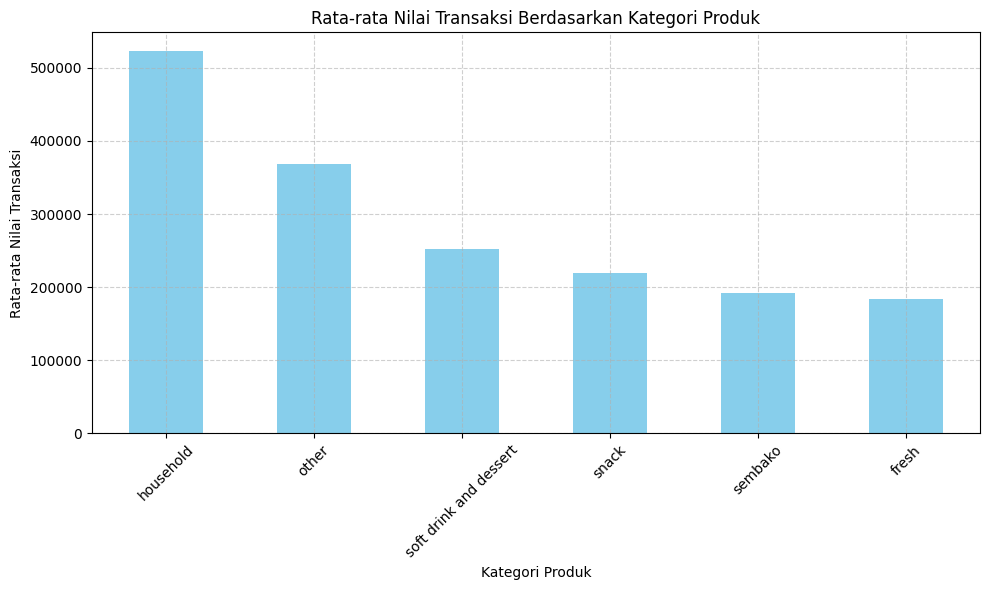

In [ ]:
# Mengambil kategori produk dari kolom 'products_persona_agg'
df['product_categories'] = df['products_persona_agg'].str.split(',')

# Meratakan daftar kategori produk menjadi baris-baris terpisah
category_expanded = df.explode('product_categories')

# Menghitung rata-rata nilai pesanan per kategori produk
avg_order_value = category_expanded.groupby('product_categories')['total_value_order'].mean()
avg_order_value_sorted = avg_order_value.sort_values(ascending=False)
print(avg_order_value_sorted)

# Visualisasi
avg_order_value_sorted.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Rata-rata Nilai Transaksi Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Rata-rata Nilai Transaksi')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kategori household memiliki rata-rata nilai transaksi tertinggi yang mengindikasikan bahwa meskipun frekuensinya tidak setinggi sembako, tetapi memiliki nilai transaksi yang cukup besar.

**3. Rata-Rata Durasi Pengiriman per Kategori Produk di Platform AlloFresh**

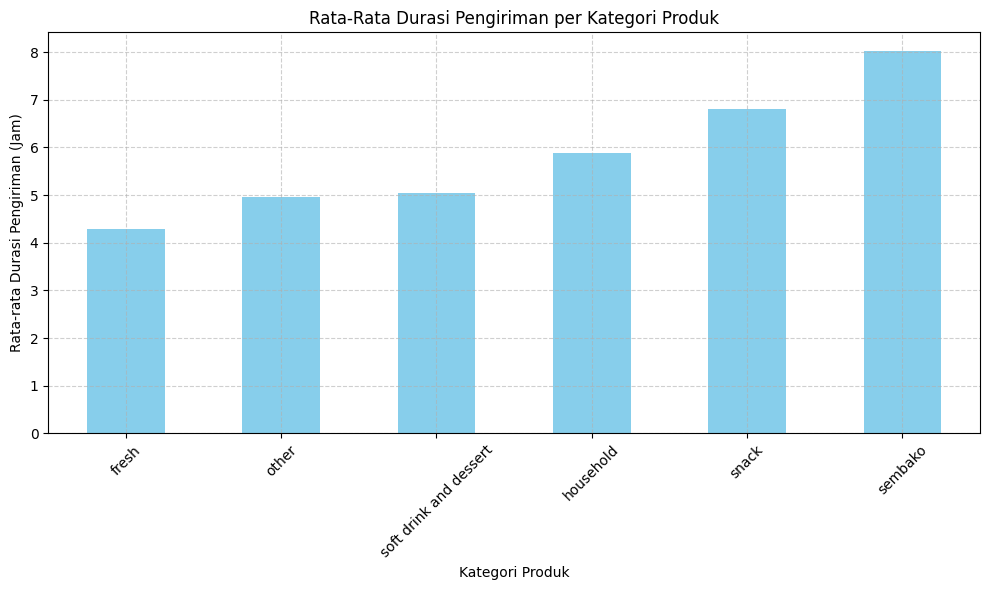

In [ ]:
# Menghitung durasi pengiriman dalam jam
df['delivery_duration'] = (df['delivered_time'] - df['order_time']).dt.total_seconds() / 3600

# Mengambil kategori produk dari kolom 'products_persona_agg'
df['product_categories'] = df['products_persona_agg'].str.split(',')

# Meratakan daftar kategori produk menjadi baris-baris terpisah
category_expanded = df.explode('product_categories')

# Menghitung rata-rata durasi pengiriman per kategori produk
avg_delivery_duration = category_expanded.groupby('product_categories')['delivery_duration'].mean()
avg_delivery_duration_sorted = avg_delivery_duration.sort_values(ascending=True)

# Visualisasi
avg_delivery_duration_sorted.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Rata-Rata Durasi Pengiriman per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Rata-rata Durasi Pengiriman (Jam)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kategori sembako memiliki durasi pengiriman paling lama dibanding kategori lain, sedangkan produk fresh dikirim paling cepat.

**4. Trend Total Nilai Penjualan Mingguan**

order_time
2024-03-03    3.579806e+08
2024-03-10    1.034263e+09
2024-03-17    1.617737e+09
2024-03-24    4.757447e+09
2024-03-31    2.341821e+09
Freq: W-SUN, Name: total_value_order, dtype: float64


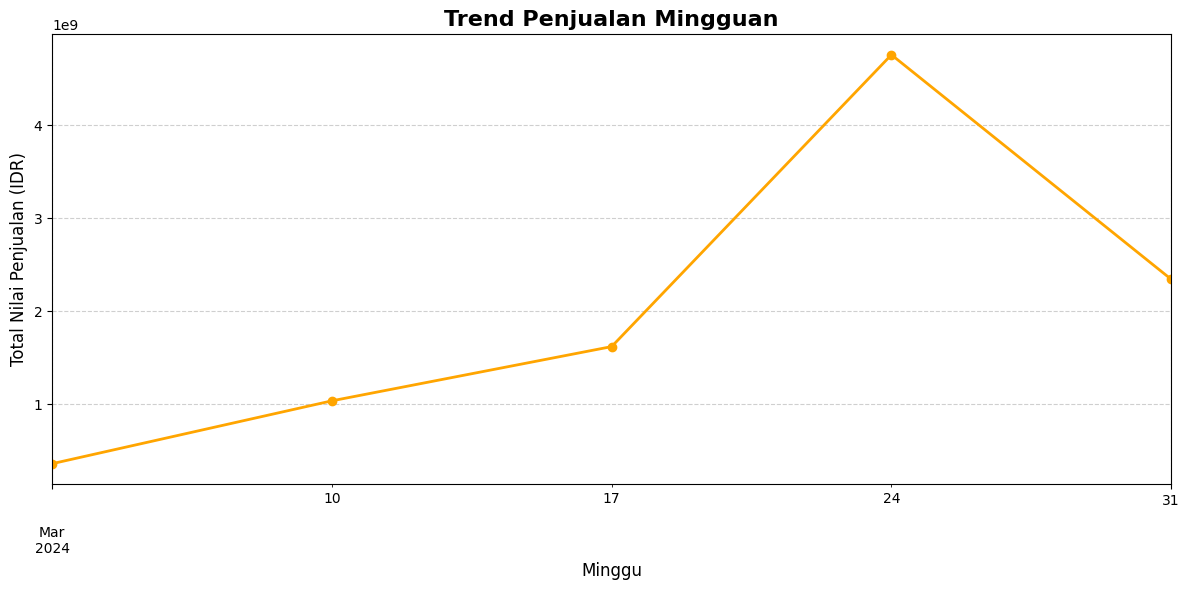

In [ ]:
week_sales = df.groupby(pd.Grouper(key='order_time', freq='W'))['total_value_order'].sum()
print(week_sales)
plt.figure(figsize=(12, 6))
week_sales.plot(kind='line', marker='o', color='orange', linewidth=2)
plt.title('Trend Penjualan Mingguan', fontsize=16, fontweight='bold')
plt.xlabel('Minggu', fontsize=12)
plt.ylabel('Total Nilai Penjualan (IDR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Penjualan meningkat tajam pada minggu ke-4 Maret 2024, namun langsung menurun signifikan di minggu terakhir.

**5. Distribusi Penjualan per Jam atau Peak Hour Penjualan**

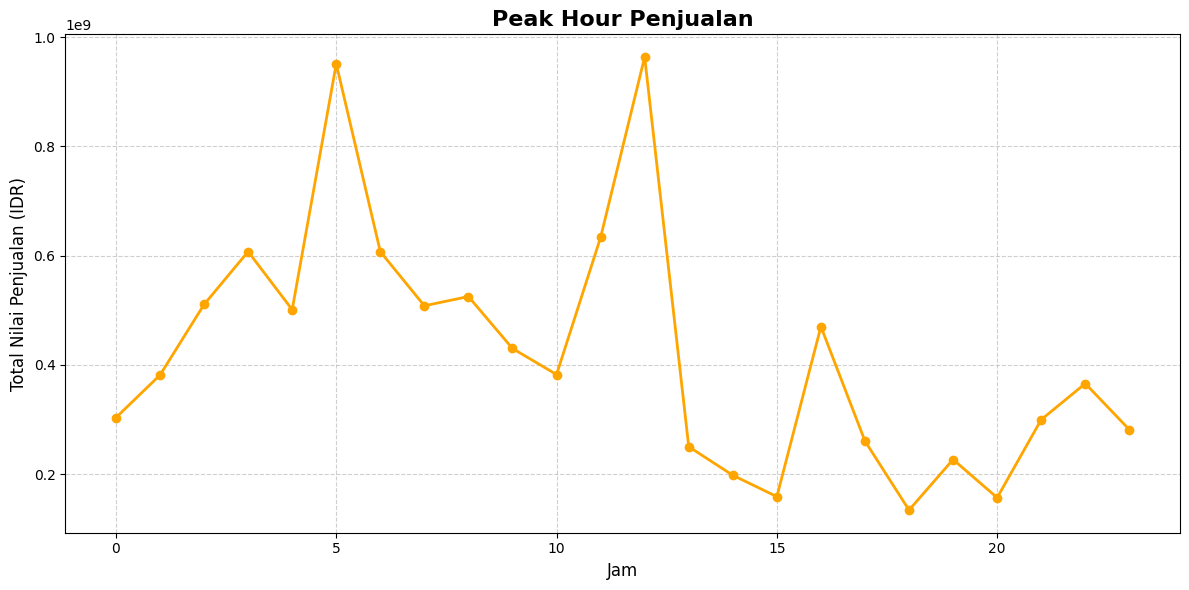

In [ ]:
hourly_sales = df.groupby(df['order_time'].dt.hour)['total_value_order'].sum()
plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='line', marker='o', color='orange', linewidth=2)
plt.title('Peak Hour Penjualan', fontsize=16, fontweight='bold')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Nilai Penjualan (IDR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Penjualan mencapai puncaknya pada pukul 5 pagi dan 12 siang, menunjukkan dua waktu utama dengan aktivitas transaksi tertinggi.

**6. Perbandingan Rata-rata Penjualan antara Weekday dan Weekend**

Rata-rata Penjualan per Weekend dan Weekday:
order_time
Weekday    274034.136811
Weekend    192704.153369
Name: total_value_order, dtype: float64


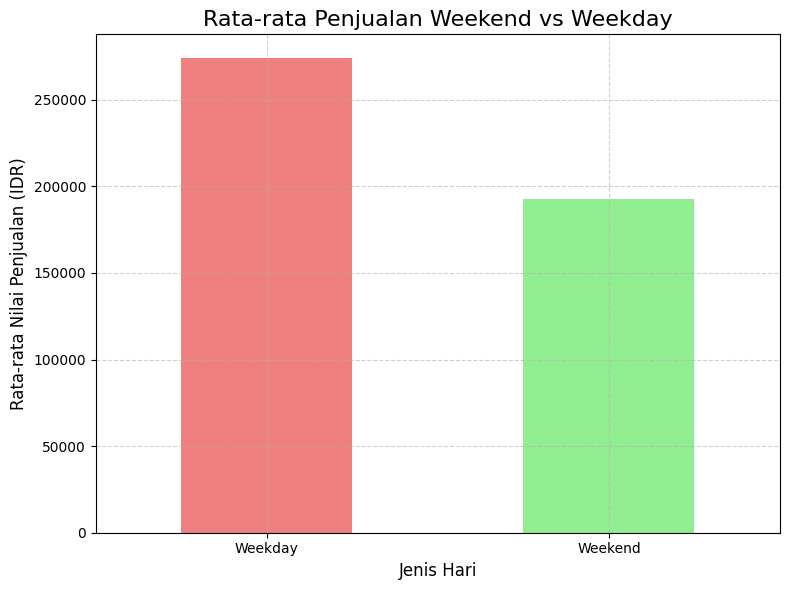

In [ ]:
# Menghitung rata-rata penjualan berdasarkan weekend dan weekday
average_sales = df.groupby(df['order_time'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'))['total_value_order'].mean()
print("Rata-rata Penjualan per Weekend dan Weekday:")
print(average_sales)

# Visualisasi
average_sales.plot(kind='bar', color=['lightcoral', 'lightgreen'], figsize=(8, 6))
plt.title('Rata-rata Penjualan Weekend vs Weekday', fontsize=16)
plt.xlabel('Jenis Hari', fontsize=12)
plt.ylabel('Rata-rata Nilai Penjualan (IDR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Penjualan rata-rata pada hari kerja (weekday) lebih tinggi dibandingkan dengan akhir pekan (weekend).

**7. Top 5 Store dengan Nilai Penjualan Tertinggi**

Top 5 Store dengan Penjualan Tertinggi:
   store_code  total_value_order
7       40014       1.018233e+09
0       10011       9.539712e+08
1       10059       9.097787e+08
4       10075       7.330266e+08
5       10087       6.776985e+08


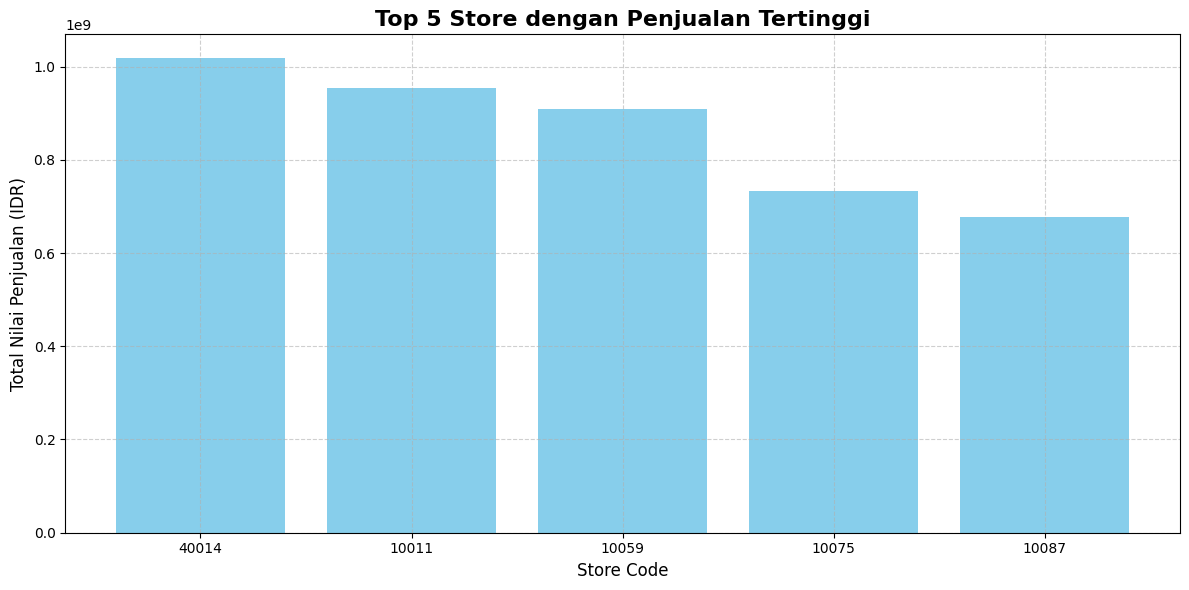

In [ ]:
# Memeriksa statistik deskriptif
desc = df['total_value_order'].describe()

# Memfilter data untuk menghindari nilai ekstrem berdasarkan statistik deskriptif
# Menggunakan batas atas dari 75% + 1.5 * IQR (Interquartile Range)
IQR = desc['75%'] - desc['25%']
upper_limit = desc['75%'] + 1.5 * IQR
lower_limit = desc['25%'] - 1.5 * IQR

# Mengeliminasi nilai di luar batas yang ditentukan
filtered_df = df[(df['total_value_order'] >= lower_limit) & (df['total_value_order'] <= upper_limit)]

# Membuat pivot table
pivot_stores = pd.pivot_table(
    data=filtered_df,
    index='store_code',
    values='total_value_order',
    aggfunc='sum'
).reset_index()
pivot_stores_sorted = pivot_stores.sort_values(by='total_value_order', ascending=False).head(5)
print("Top 5 Store dengan Penjualan Tertinggi:")
print(pivot_stores_sorted)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.bar(pivot_stores_sorted['store_code'].astype(str), pivot_stores_sorted['total_value_order'], color='skyblue')
plt.title('Top 5 Store dengan Penjualan Tertinggi', fontsize=16, fontweight='bold')
plt.xlabel('Store Code', fontsize=12)
plt.ylabel('Total Nilai Penjualan (IDR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Lima store dengan kode 40014, 10011, 10059, 10075, dan 10087 mencatatkan total penjualan tertinggi, dengan store 40014 sebagai yang paling unggul.

**8. Top 5 Store dengan Jumlah Pelanggan Paling Banyak**

Top 5 Store dengan Pelanggan Terbanyak:
   store_code  user_id
0       10011     2460
4       10075     2395
9       40017     2384
3       10072     2050
1       10059     1954


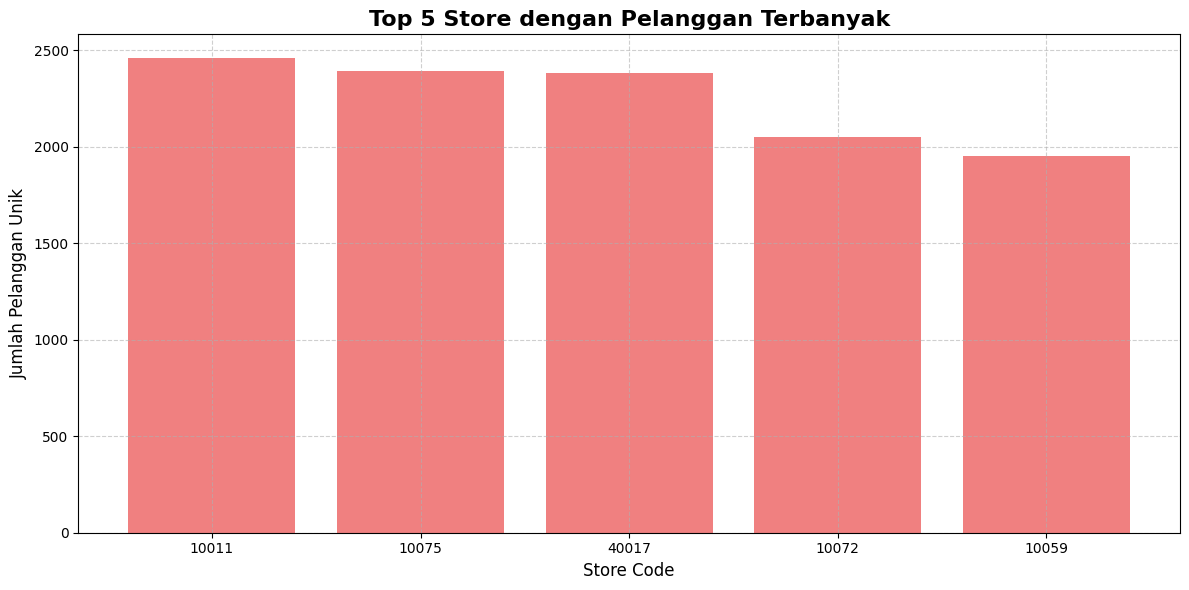

In [ ]:
# Membuat pivot table
pivot_customers = pd.pivot_table(
    data=df,
    index='store_code',
    values='user_id',
    aggfunc='nunique'
).reset_index()
top_5_customers = pivot_customers.sort_values(by='user_id', ascending=False).head(5)
print("Top 5 Store dengan Pelanggan Terbanyak:")
print(top_5_customers)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.bar(top_5_customers['store_code'].astype(str), top_5_customers['user_id'], color='lightcoral')
plt.title('Top 5 Store dengan Pelanggan Terbanyak', fontsize=16, fontweight='bold')
plt.xlabel('Store Code', fontsize=12)
plt.ylabel('Jumlah Pelanggan Unik', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Store 10011 mencatat jumlah pelanggan tertinggi, diikuti oleh store 10075 dan 40017.

**9. Ketepatan Waktu Pengantaran Pesanan**

Jumlah Pengiriman per Status:
delivery_status
Terlambat            17704
Pending/Cancelled    12996
Tepat Waktu          10022
Name: count, dtype: int64


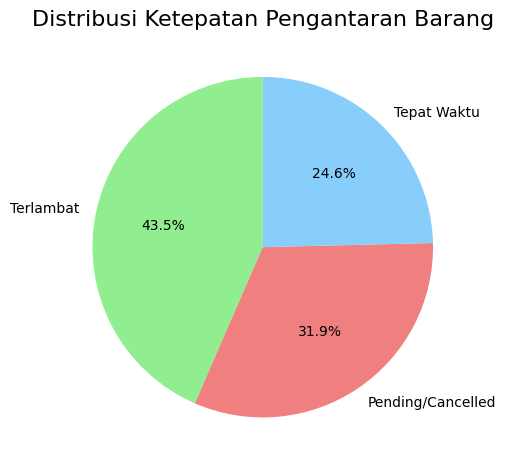

In [ ]:
# Menghitung durasi pengiriman dalam jam
df['delivery_duration'] = (df['delivered_time'] - df['order_time']).dt.total_seconds() / 3600  # durasi dalam jam

# Menentukan kategori ketepatan pengiriman
def delivery_status(row):
    if pd.isna(row['delivered_time']):
        return 'Pending/Cancelled'
    elif row['delivery_duration'] <= 2:
        return 'Tepat Waktu'
    else:
        return 'Terlambat'
df['delivery_status'] = df.apply(delivery_status, axis=1)
delivery_counts = df['delivery_status'].value_counts()
print("Jumlah Pengiriman per Status:")
print(delivery_counts)

# Visualisasi
df['delivery_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightskyblue'], legend=False)
plt.title('Distribusi Ketepatan Pengantaran Barang', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


Dengan highlight pengiriman cepat yang akan tiba dalam 2 jam pada Platform Allofresh, ternyata sebagian besar pengantaran mengalami keterlambatan atau belum selesai, dengan hanya 24,6% pesanan yang dikirim tepat waktu.

**10. Analisis Hubungan Antara Jarak Pengiriman dan Status Keterlambatan Pengiriman Pesanan**

Jumlah Pengiriman per Status:
delivery_status
Terlambat            17704
Pending/Cancelled    12996
Tepat Waktu          10022
Name: count, dtype: int64


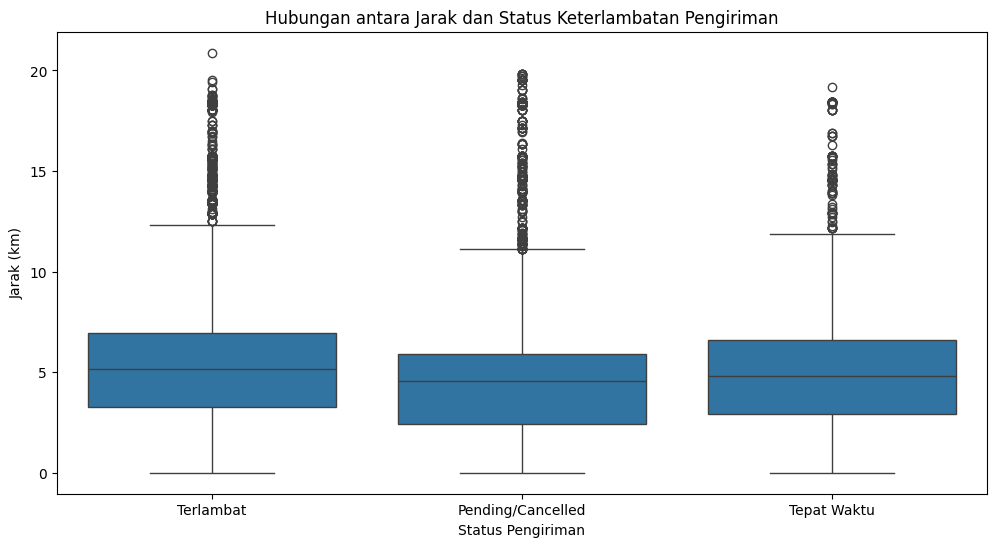

In [ ]:
from geopy.distance import geodesic

# Menghitung jarak antara dua koordinat
def calculate_distance(store_location, user_location):
    store_coords = tuple(map(float, store_location.split(',')))  # Konversi ke tuple
    user_coords = tuple(map(float, user_location.split(',')))  # Konversi ke tuple
    return geodesic(store_coords, user_coords).kilometers  # Menghitung jarak dalam km
df['distance'] = df.apply(lambda row: calculate_distance(row['store_location'], row['user_location']), axis=1)

# Menghitung durasi pengiriman dalam jam
df['delivery_duration'] = (df['delivered_time'] - df['order_time']).dt.total_seconds() / 3600  # durasi dalam jam

# Menentukan kategori ketepatan pengiriman
def delivery_status(row):
    if pd.isna(row['delivered_time']):
        return 'Pending/Cancelled'
    elif row['delivery_duration'] <= 2:
        return 'Tepat Waktu'
    else:
        return 'Terlambat'
df['delivery_status'] = df.apply(delivery_status, axis=1)
delivery_counts = df['delivery_status'].value_counts()
print("Jumlah Pengiriman per Status:")
print(delivery_counts)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.boxplot(x='delivery_status', y='distance', data=df)
plt.title('Hubungan antara Jarak dan Status Keterlambatan Pengiriman')
plt.xlabel('Status Pengiriman')
plt.ylabel('Jarak (km)')
plt.show()

Distribusi jarak pengiriman menunjukkan bahwa pengiriman dengan jarak lebih jauh cenderung memiliki keterlambatan yang lebih besar. Namun, terdapat beberapa pengiriman dengan jarak lebih jauh yang tetap tepat waktu, meskipun durasinya lebih lama.

**11. Analisis produk yang sering pending**

Jumlah pengiriman pending: 12996
Produk yang Paling Sering Pending per Kategori:
products_persona_agg
sembako                   7141
household                 5105
snack                     2792
soft drink and dessert    2167
fresh                     1708
other                       27
dtype: int64


<ipython-input-26-e9ca429e6d32>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pending_orders['products_persona_agg'] = pending_orders['products_persona_agg'].str.split(',')


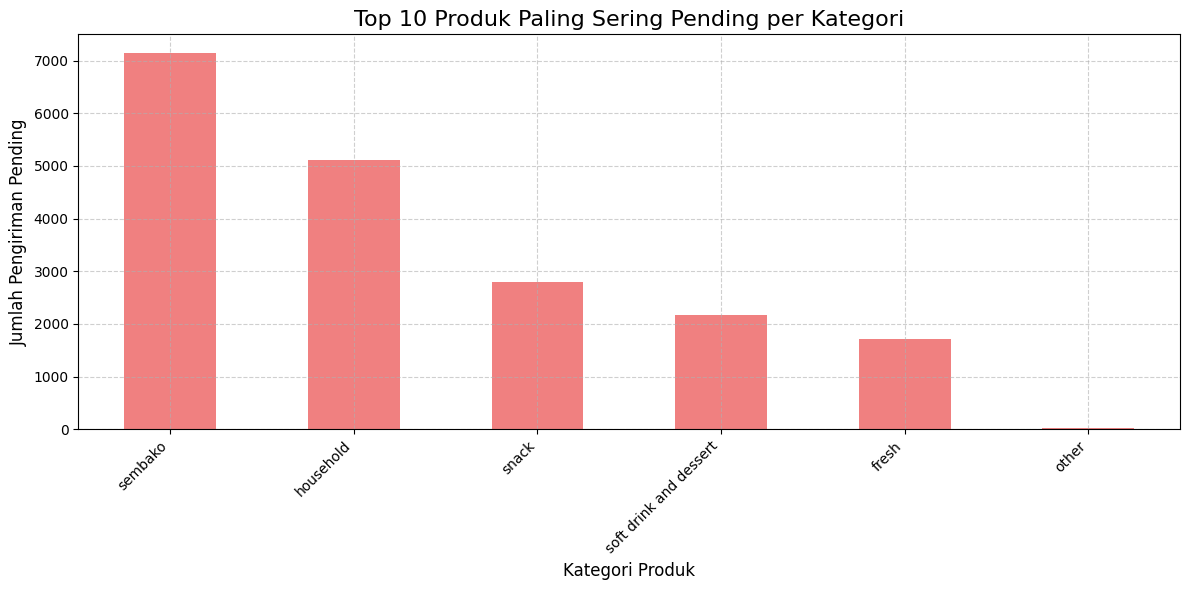

In [ ]:
# Menghitung durasi pengiriman
df['delivery_duration'] = (df['delivered_time'] - df['order_time']).dt.total_seconds() / 3600

# Kategori ketepatan pengiriman
def delivery_status(row):
    if pd.isna(row['delivered_time']):
        return 'Pending'
    elif row['delivery_duration'] <= 2:
        return 'Tepat Waktu'
    else:
        return 'Terlambat'
df['delivery_status'] = df.apply(delivery_status, axis=1)

# Menghitung pengiriman pending
pending_orders = df[df['delivery_status'] == 'Pending']
print(f"Jumlah pengiriman pending: {len(pending_orders)}")

# Memisahkan kategori pada produk
pending_orders['products_persona_agg'] = pending_orders['products_persona_agg'].str.split(',')

# Menyebarkan kategori produk
exploded_products = pending_orders.explode('products_persona_agg')

# Menghitung jumlah produk pending per kategori
product_pending_per_category = exploded_products.groupby('products_persona_agg').size().sort_values(ascending=False)

# Menampilkan produk yang paling sering pending per kategori
print("Produk yang Paling Sering Pending per Kategori:")
print(product_pending_per_category.head(10))  # Menampilkan 10 kategori produk teratas yang sering pending

# Visualisasi produk yang paling sering pending per kategori
plt.figure(figsize=(12, 6))
product_pending_per_category.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Produk Paling Sering Pending per Kategori', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Jumlah Pengiriman Pending', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Produk dengan kategori sembako mendominasi jumlah pengiriman pending, diikuti oleh produk household dan snack, menunjukkan ketidakstabilan dalam pengiriman produk-produk tersebut.